In [28]:
import numpy as np
from sklearn import model_selection #division de datos
import joblib
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
import seaborn as sns
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt

In [29]:
path = os.path.normpath(os.getcwd() + os.sep + os.pardir)   #obtener path de carpeta principal

In [30]:
#metodo para importar datos x, y
def importarDatos (nombre_vector_tfidf, etiquetas): #carga datos para entrenamiento y prueba
    path = os.path.normpath(os.getcwd() + os.sep + os.pardir)
    a = np.load(path+"/3.Extraccion_caracteristicas/"+nombre_vector_tfidf)
    b = np.load(path+"/3.Extraccion_caracteristicas/"+etiquetas)
    X = a['arr_0']
    y = b['arr_0']
    return X, y

Dividimos los datos en entrenamiento y prueba, cabe recalcar que la división de datos sera de la misma forma que se realizó para el entrenamiento de los modelos ya que mediante el hiperparametro  'random_state' le asignamos la misma semilla

In [31]:
#Cargamos los datos
x, y = importarDatos("x_tfidf_Unigrama.npz","y_tfidf_Unigrama.npz")
#separamos los datos en los conjuntos de entrenamiento prueba
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=seed) # 80% training y 20% test

Cargamos el mejor modelo entrenado por cada tipo de algoritmo que se guardó en el entrenamieto.

In [32]:
# cara¿gamos los modelos
SVM = joblib.load(path+"/modelo_SVM_Unigram.pkl")
RF = joblib.load(path+"/modelo_RF_Unigram.pkl")
NB = joblib.load(path+"/modelo_NB_Unigram.pkl")

In [33]:
#predecimos el sentimiento en base a los datos independientes de prueba (X_test) 
y_predict_SVM = SVM.predict(X_test)
y_predict_RF = RF.predict(X_test)
y_predict_NB = NB.predict(X_test)

In [75]:
#print(precision_score(y_test, y_predict_SVM))  # para la clase depresiva
#print(precision_score(y_test, y_predict_SVM, pos_label=1))
#print(precision_score(y_test, y_predict_SVM, pos_label=0))

Creamos un dataframe que contenga los valores reales de prueba (y_test) y los valores predichos por cada tipo de algoritmo (y_predict), esto con la finalidad de ver de forma gráfica la cantidad de valores predichos de cada uno.

In [34]:
#Modelo svm
svm_df = pd.DataFrame(y_test,columns=['Prueba'])
svm_df['Prediccion'] =  pd.DataFrame(y_predict_SVM,columns=['Prueba'])
svm_df['Modelo'] =  'svm'
#Modelo rf
rf_df = pd.DataFrame(y_test,columns=['Prueba'])
rf_df['Prediccion'] =  pd.DataFrame(y_predict_RF,columns=['Prueba'])
rf_df['Modelo'] =  'rf'
#Modelo nb
nb_df = pd.DataFrame(y_test,columns=['Prueba'])
nb_df['Prediccion'] =  pd.DataFrame(y_predict_NB,columns=['Prueba'])
nb_df['Modelo'] =  'nb'

result = pd.concat([svm_df, rf_df, nb_df])

Graficamos los valores reales de prueba y los valores predichos por cada algoritmo

Text(-3.055555555555541, 0.5, '# de tweets')

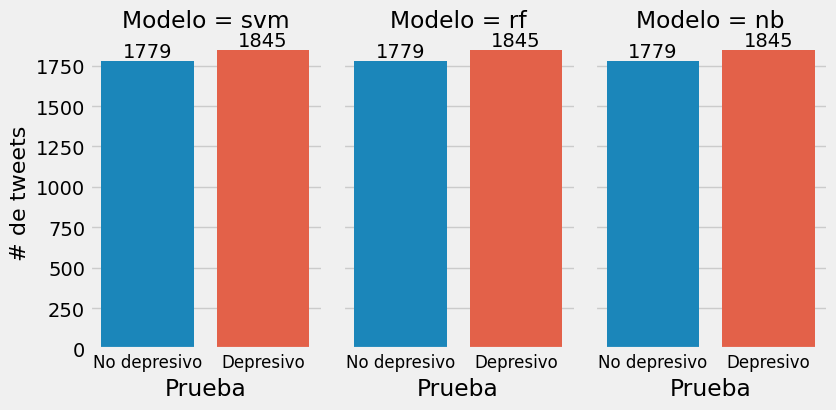

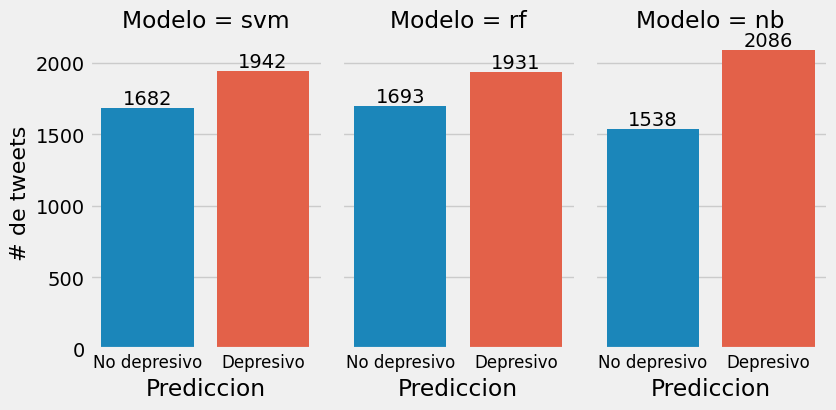

In [35]:

g=sns.catplot(x="Prueba", col="Modelo",
                data=result, kind="count",
                height=4, aspect=.7); #, palette=sns.color_palette("tab10"));

#g.color_palette("tab10")

g.fig.set_size_inches(10, 5)
g.fig.subplots_adjust(top=0.81, right=0.86)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)
# iterate through the axes containers
for ax in g.axes.ravel():
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
        ax.set_xticklabels(["No depresivo","Depresivo"],fontsize=12)

plt.ylabel("# de tweets", size=16)   

# Charmander
g1=sns.catplot( x="Prediccion", col="Modelo",
                data=result, kind="count",
                height=4, aspect=.7);
#axes[1].set_title(charmander.name)
g1.fig.set_size_inches(10, 5)
g1.fig.subplots_adjust(top=0.81, right=0.86)
# extract the matplotlib axes_subplot objects from the FacetGrid
ax1 = g1.facet_axis(0, 0)
# iterate through the axes containers
for ax1 in g1.axes.ravel():
    for c in ax1.containers:
        labels = [v.get_height() for v in c]
        ax1.bar_label(c, labels=labels, label_type='edge')
        ax1.set_xticklabels(["No depresivo","Depresivo"],fontsize=12)
        
plt.ylabel("# de tweets", size=16) 

En base a los resultados anteriores, se calcula el rendimiento de cada algoritmo mediante métricas de evaluación (Precision, Accuracy, F1-Score y Recall).

In [36]:
#Calcular métricas para cada etiqueta y encontrar su media no ponderada. 
#Rendimiento mediante metricas para Support Vector Machines
precision_svm = precision_score(y_test, y_predict_SVM)
accuracy_svm = accuracy_score(y_test, y_predict_SVM)
f1score_svm = f1_score(y_test, y_predict_SVM)
recall_svm = recall_score(y_test, y_predict_SVM)
#Rendimiento mediante metricas para Random Forest
precision_rf = precision_score(y_test, y_predict_RF)
accuracy_rf = accuracy_score(y_test, y_predict_RF)
f1score_rf = f1_score(y_test, y_predict_RF)
recall_rf = recall_score(y_test, y_predict_RF)
#Rendimiento mediante metricas para Naive Bayes
precision_nb = precision_score(y_test, y_predict_NB)
accuracy_nb = accuracy_score(y_test, y_predict_NB)
f1score_nb = f1_score(y_test, y_predict_NB)
recall_nb = recall_score(y_test, y_predict_NB)
#Presentamos el porcentaje de rendimiento de los 3 algoritmos
print('SVM')
print('precision ',precision_svm)
print('accuracy ',accuracy_svm)
print('f1-score ',f1score_svm)
print('recall ',recall_svm)
print('RF')
print('precision ',precision_rf)
print('accuracy ',accuracy_rf)
print('f1-score ',f1score_rf)
print('recall ',recall_rf)
print('NB')
print('precision ',precision_nb)
print('accuracy ',accuracy_nb)
print('f1-score ',f1score_nb)
print('recall ',recall_nb)

SVM
precision  0.9284243048403708
accuracy  0.9500551876379691
f1-score  0.9522049115394773
recall  0.9772357723577236
RF
precision  0.9347488348006214
accuracy  0.9541942604856513
f1-score  0.9560381355932204
recall  0.978319783197832
NB
precision  0.8518696069031639
accuracy  0.8959713024282561
f1-score  0.9040956499618417
recall  0.9631436314363143


Creamos un dataframe que guarde los porcentajes de rendimiento obtenidos para mostrarlo de forma gráfica

In [37]:
df = pd.DataFrame({"SVM": [precision_svm,accuracy_svm,f1score_svm,recall_svm], 
                   "RF": [precision_rf,accuracy_rf,f1score_rf,recall_rf],
                   "NB": [precision_nb,accuracy_nb,f1score_nb,recall_nb],
                   "Metrica": ['Precision','Accuracy','F1-Score','Recall']
                   
                  })
df

,SVM,RF,NB,Metrica
0,0.928424,0.934749,0.851870,Precision
1,0.950055,0.954194,0.895971,Accuracy
2,0.952205,0.956038,0.904096,F1-Score
3,0.977236,0.978320,0.963144,Recall


Graficamos los porcentajes de las métricas de evaluación obtenido de los 3 modelos

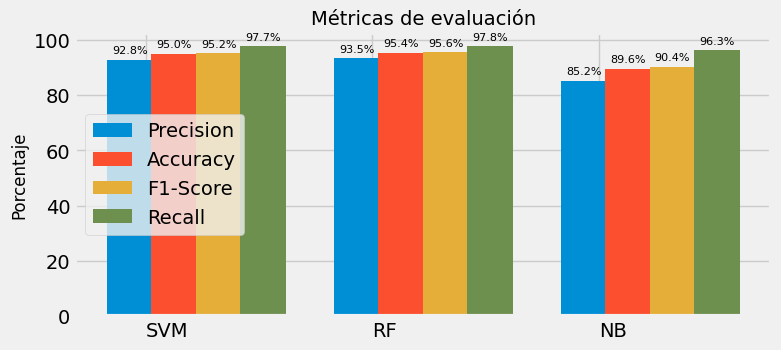

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.style.use('fivethirtyeight') #estilo de colores
plt.rcParams["figure.figsize"] = (8,3.5) #tamaño de la figura
labels = ['SVM', 'RF', 'NB']
precision = [round(precision_svm*100, 1), round(precision_rf*100, 1), round(precision_nb*100, 1)]
accuracy = [round(accuracy_svm*100, 1), round(accuracy_rf*100, 1), round(accuracy_nb*100, 1)]
f1 = [round(f1score_svm*100, 1), round(f1score_rf*100, 1), round(f1score_nb*100, 1)]
recall = [round(recall_svm*100, 1), round(recall_rf*100, 1), round(recall_nb*100, 1)]

x = np.arange(len(labels))  # the label locations
ind = np.arange(7)
dist = 0.07 # distancia entre barras
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x- dist , precision, width, label='Precision') #posicion horizontal barras
rects2 = ax.bar(x + (1.8*dist) , accuracy, width, label='Accuracy')
rects3 = ax.bar(x + (4.6*dist), f1, width, label='F1-Score')
rects4 = ax.bar(x + (7.4*dist), recall, width, label='Recall')

ax.set_ylabel('Porcentaje',fontsize=12)
ax.set_title('Métricas de evaluación',fontsize=14)
ax.set_xticks(x) #(x, fontsize=7)
ax.set_xticklabels(labels,fontsize=14, ha='left')#rotation=45)
ax.legend()

def autolabel(rects):
    """Adjunte una etiqueta de texto sobre cada barra en *rects*, mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2,  height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=8)

plt.legend(loc='center left') #mover el texto refeerencia a la parte izquierda 
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
plt.show()